In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment

from scipy.io import wavfile

import pyaudio
import wave

from pyannote.core import Annotation, Segment
from pyannote.audio.pipelines import VoiceActivityDetection
# https://github.com/pyannote/pyannote-audio

In [2]:
samplerate, data = wavfile.read('Data/Grabacion.wav')

In [21]:
pipeline = VoiceActivityDetection(segmentation="pyannote/segmentation")
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}
pipeline.instantiate(HYPER_PARAMETERS)

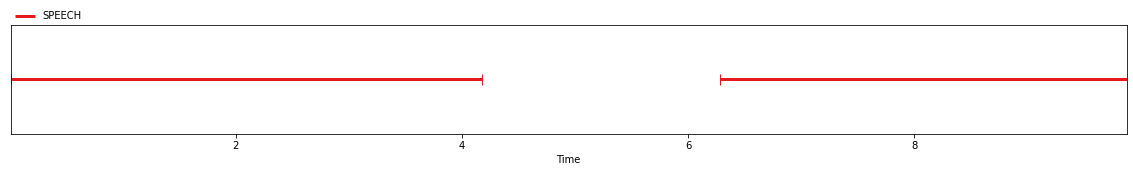

In [50]:
vad = pipeline('Data/Grabacion.wav')
# `vad` is a pyannote.core.Annotation instance containing speech regions

vad

In [26]:
x = vad.get_timeline().segments_set_